### Realizando todos os imports que serão necessário para o equacionamento do TG

In [5]:
import sympy  as sp
import numpy as np 
import pandas as pd 
import math as mt 
import matplotlib.pyplot as plt



In [150]:
from sympy import beta


x, y, z, phi, T, T_max, T1, T2, T4,T_mr,delta_T_phi,delta_T_zp,delta_T_zs, delta,P,  P1, P2, P3, A_ref, A_h_eff, phi_ZP, theta, q_ref, A_h_reff, delta_P_3_4, R, m_ponto_3, T3, k, D_ref, phi_global, m_ponto_zp, phi_pobre, phi_rico,A_ft, D_ref, L_cc, L_zp, L_zs, L_zd,L_sz,L_zr, L_dz,  phi_Zs, m_ponto_arref, m_ponto_zd, eta_zr, eta_zp, eta_zs, p_3,T_med_zr, T_max_zr, delta_p, psi_t3, m_ponto_comb,V_zs, teste, T_saida_zp, T_saida_zs, T_saida_zd, mg_ponto_zr, mg_ponto_zp, mg_ponto_zs, m_ponto_zs, rho_an,u_an,rho_g, u_g, m_ponto_fenda, A_fenda, m_ponto_g, mi_ar, mi_g, T_g,  eta_r,D_ft, m_ponto_fenda_zp, m_ponto_fenda_zp, m_ponto_fenda_zs, m_ponto_fenda_zd,mi, beta  = sp.symbols(
    [
    'x','y','z', 'phi', 'T', 'T_max', 'T1', 'T2', 'T4', 'T_mr', 'delta_T_phi', 'delta_T_zp','delta_T_zs', 'delta','P', 'P1',
    'P2', 'P3', 'A_ref', 'A_h_eff', 'phi_ZP', 'theta', 'q_ref', 'A_h_reff', 
    'delta_P_3_4','R', 'm_ponto_3','T3', 'k', 'D_ref', 'phi_global', 'm_ponto_zp', 'phi_pobre', 
    'phi_rico','A_ft','D_ref','L_cc','L_zp','L_zs','L_zd', 'L_sz', 'L_zr','L_dz',  
    'phi_Zs','m_ponto_arref', 'm_ponto_zd','eta_zr','eta_zp','eta_zs', 'p_3', 'T_med_zr', 
    'T_max_zr','delta_p', 'psi_t3', 'm_ponto_comb', 'V_zs', 'teste', 'T_saida_zp', 
    'T_saida_zs', 'T_saida_zd', 'mg_ponto_zr', 'mg_ponto_zp', 'mg_ponto_zs', 'm_ponto_zs', 
    'rho_an','u_an','rho_g', 'u_g', 'm_ponto_fenda', 'A_fenda','m_ponto_g', 'mi_ar', 'mi_g', 'T_g',  'eta_r', 'D_ft', 'm_ponto_fenda_zp', 'm_ponto_fenda_zd', 'm_ponto_fenda_zs', 'm_ponto_fenda_zd', 'mi', 'beta' 
    ])




### Funcao da equação (5):

𝐶𝑥𝐻𝑦 + 𝑎𝑂2 → 𝑥𝐶𝑂2 + (𝑦⁄2)𝐻2O

In [40]:
 #Equacao 5
def razao_ar_comb_esteq(a, PMar, PMcomb):
    A_C_esteq = a*(1 + 3.7274 + 0.0458) * (PMar/PMcomb)
    return A_C_esteq

teste = razao_ar_comb_esteq(17.75, 28.9645, 167.3087)
# phi_esteq = 1/teste
# phi_esteq



### razão de equivalência
A razão de equivalência é uma relação frequentemente usada para indicar se a mistura
está pobre, rica ou está estequiométrica. A razão de equivalência é definida como:

𝜙 =
(𝐴/𝐶)𝑒𝑠𝑡𝑒𝑞
(𝐴/𝐶)𝑟𝑒𝑎𝑙
=
(𝐶/𝐴)𝑟𝑒𝑎𝑙
(𝐶/𝐴)𝑒𝑠𝑡𝑒q

In [177]:
#Equacao 8 - Define se a mistura é rica ou pobre
def razao_equivalencia(A_C_esteq, A_C_real):
    phi = A_C_esteq/A_C_real
    return ('rica' if phi > 1 else 'pobre')




### OBSERVAÇÃO

Colocar as equações de quantidade de calor e entalpia se fizer sentido

DUVIDA : COMO FAREMOS COM RELAÇÃO AO EQUACIONAMENTO DA Temperatura de Chama Adiabática ? 

### Turbina a gás

- Componente 1:
    - Compressor, que recebe potência de eixo da turbina, converte em energia que é
entregue ao ar elevando a sua entalpia e, por consequência, a pressão e a temperatura
desse fluido de trabalho

- Componente 2:
    - Câmara de combustão, onde o ar, proveniente do compressor, é misturado ao
combustível, formando os reagentes. É fornecida energia de ativação para que a
combustão desses reagentes inicie e se processe em seu interior


- Componente 3:
    - Turbina, dispositivo mecânico ideal que converte a entalpia dos gases quentes advindos
da câmara de combustão em energia mecânica em potência de eixo

### Perda de pressao quente/fria

- Sendo 𝑃1 e 𝑃2 as pressões totais nas seções transversais logo ao início e logo ao final do difusor, respectivamente

- Onde os parâmetros 𝐴𝑟𝑒𝑓 e 𝑞𝑟𝑒𝑓 são, respectivamente, a área transversal e a pressão
dinâmica avaliadas num plano de máxima área transversal da câmara de combustão, delimitada
pelo seu invólucro

- Já o termo 𝐴ℎ,𝑒𝑓𝑓, que representa a área efetiva total dos orifícios do tubo
de chama, pode ser calculado de duas formas

In [42]:
def perda_pressao_quente(rho, u, T4, T3):
    delta_P_quente = 0.5 * rho * (u**2) * ((T4/T3) - 1 )
    return delta_P_quente



delta_P_difusor = P1 - P2  #Sendo 𝑃1 e 𝑃2 as pressões totais nas seções transversais logo ao início e logo ao final do difusor, respectivamente

def P_turboChama(A_ref, A_h_eff, q_ref):   

    delta_P_turbo_chama = ((A_ref/A_h_eff) ** 2) * q_ref

    return delta_P_turbo_chama

def perda_pressao_fria(P_difusor, P_turbo_chama):
    delta_P_fria = sum(P_difusor, P_turbo_chama)
    return delta_P_fria


### Dimensionalizando os orificios do tubo de chama:

In [43]:
def dimensao_orificio_tubo_chama(A_ref, delta_p_3_4, q_ref, delta_P_difusor):
    dimensao_orificioTuboChama = A_ref/(((delta_p_3_4/q_ref) - (delta_P_difusor/q_ref))**0.5)
    return dimensao_orificioTuboChama

### Calculando A_h_reff

In [44]:
#Como esperando muitos valores de entrada para fazermos o somatório, passaremos como entrada uma lista

C_d = []
A_h = []

def A_h_eff_function(C_d, A_h):
    somatorio_A_h_reff = 0
    for c in range(len(C_d)):
        somatorio_A_h_reff =  somatorio_A_h_reff + C_d[c] * A_h[c]  
        
    return somatorio_A_h_reff

# A_h_eff_function(C_d, A_h)


### Parametros para especificar a perda de pressão

- O primeiro (∆𝑃3−4/𝑃3), chamado de perda de pressão global, geralmente assume
valores entre 4% a 8%, dependendo do tipo de câmara de combustão. O segundo termo
(∆𝑃3−4/𝑞𝑟𝑒𝑓), chamado de fator de perda de pressão, é mais expressivo para o projetista pois
denota a resistência do fluido em atravessar a câmara de combustão. Aerodinamicamente, pode
ser considerado um equivalente ao “coeficiente de arrasto”. Ambos os termos não consideram
a perda “quente” 

In [179]:
delta_P_3_4 = P3 *(delta_P_3_4/q_ref) * (R/2) * ( (((m_ponto_3 * (T3**0.5)))/ (A_ref*P3))**2 )

delta_P_3_4

R**2*T3**1.0*delta_P_3_4*m_ponto_3**2*(T3*m_ponto_3)**1.0/(4*A_ref**4*P3**2*q_ref**2)

### Qualidade Transversal de temp e Perfil Radial de temp


- São dois os termos usados para descrever o perfil de temperatura transversal: a
Qualidade Transversal de Temperatura (em inglês, Temperature Factor, Traverse Number ou
Pattern Factor) e o Perfil Radial de Temperatura (em inglês, Profile Factor), expressos
matematicamente a seguir:

In [46]:
def qualidade_tranversal_temp(T_max, T4, T3):
    qualidade_trans_temp = (T_max - T4)/(T4 - T3)
    return qualidade_trans_temp

def perfil_radial_temp(T_mr, T4, T3):
    perfil_rad_temp = (T_mr - T4)/(T4 - T3)
    return perfil_rad_temp

#Onde 𝑇𝑚𝑎𝑥 é a máxima temperatura dos gases na saída da câmara de combustão e 𝑇𝑚𝑟 é a temperatura média mais alta de uma linha de circunferência escolhida
    

### Informacões para dimensionar do combustor

- Vazão mássica
- Vazão mássica de combustível
- Distribuição de temperatura, pressão e velocidade na entrada do combustor;
- Perfil transversal de temperatura na saída do combustor;
- Limitações de perda de pressão;
- Tipos de poluentes e níveis permitidos
- Temperatura na parede permitida
- Limitações de tamanho
- Limitações de peso
- Requisitos de durabilidade e semelhança de vida útil entre as trocas de peças;
- Compatibilidade com o tipo de combustível;
- Outras limitações ou requisitos especiais.


### Calculo da área de transfência

- A constante 𝑘 varia apenas com relação às unidades usadas, é igual à 143,5 ao utilizar
a unidades do sistema internacional (SI) e é igual à 0,83, nas unidades 𝑙𝑏, 𝑓𝑡 𝑒 𝑅. O termo 𝑚̇3
é vazão mássica de ar, 𝑃3 é a pressão total e 𝑇3 a temperatura estimadas na entrada da câmara,
𝑞𝑟𝑒𝑓 é a pressão dinâmica na máxima área da seção transversal da carcaça (𝐴𝑟𝑒𝑓) e ∆𝑃3−4 é a
perda de pressão total ao longo da câmara.
Já  é a variável que se relaciona com a eficiência da combustão, . Como se busca
obter a maior eficiência possível, é utilizado o parâmetro  correspondente, tendo seu valor
igual à 73 . 106
(unidades do SI)

- O fator de correção da temperatura, b, é definido de acordo com a relação ar combustível
da zona primária. Para razão de equivalência nesta região entre 0,6 e 1,0, a fórmula 𝑏 =
245 (1,39 + ln 
𝑍𝑃) é empregada. Já para 
𝑍𝑃 entre 1,0 e 1,4

- A razão 𝑚̇𝑍𝑃 𝑚̇ ⁄ 3
, ou melhor, a porcentagem de ar a ser designada à zona primária, deve
ser escolhida de modo que a razão de equivalência no local esteja na região de flamabilidade
da mistura

In [47]:

def area_tranferencia_aerodinamica(k, m_ponto_3m, T3, P3, delta_P_3_4, q_ref):
    area_transf = k * ( ((m_ponto_3 * (T3**0.5) )/(P3))**2  * ((delta_P_3_4/q_ref)/(delta_P_3_4/P3)) ** 0.5 )
    return area_transf

def area_tranferencia_quimica(P3, A_ref, D_ref, T3, b, m_ponto_3):
    theta = ((P3**1.75) * A_ref * (D_ref ** 0.75) * np.exp(T3/b))/ m_ponto_3
    return theta



In [48]:

def phi_global_function(m_comb_op, m_ponto_3_op, m_comb, m_ponto_3):
    phi_global = (m_comb_op/m_ponto_3_op)/ (m_comb/m_ponto_3)

def phi_zp_function(phi_global, m_ponto_zp, m_ponto_3):
    phi_ZP = phi_global/(m_ponto_zp/m_ponto_3)
    return phi_ZP

### Definindo o phi pobre e o phi rico

In [49]:
def phi_pobre_function(T3):
    phi_pobre = 0.70547 - 0.00046 * T3
    return phi_pobre
def phi_rico_function(T3):
    phi_rico = 1.46695 + 0.00172 * T3
    return phi_rico

### Determinação da Área do Tubo de Chama pagina 54 eq 34

In [180]:
def area_ref_trans(A_ref):
    A_ft = 0.56*A_ref
    return A_ft

Altura de Referência e Altura do Tubo de Chama
A expressão para o cálculo da altura de referência (𝐷𝑟𝑒𝑓) e da altura do tubo de chama (𝐷𝑓𝑡) é diferente a depender do tipo de combustor o qual foi escolhido para o projeto. Baseandose na expressão relativa a área de um círculo de raio 𝑟 (área=𝜋𝑟2), pode-se chegar nas expressões contidas na Tabela 6, a partir das relações geométricas de cada tipo de combustor, como ilustrado a seguir.

Altura de referencia (D_ref)

In [51]:
def altura_referencia(A_ref,D_int):
    D_ref = (np.sqrt([(4*A_ref)/np.pi()]-pow(D_int,2))-D_int)/2
    return D_ref

Altura do Tubo de Chama (D_ft)

In [52]:
def altura_tubo_chama(A_ft,D_int,D_ref):
    D_ft = (A_ft/(np.pi()*(D_int+D_ref)))
    return D_ft

Determinação do Comprimento das Zonas (36)
Com base os estudos de Melconian e Modak , o comprimento da zona primária (𝐿𝑍𝑃) pode ser estimado como estando entre 2/3 e 3/4 da altura do tubo de chama – caso a limitação de espaço permita, a escolha último valor é preferível já que concede uma maior eficiência de combustão. Como parte da zona primária, a zona de recirculação tem seu comprimento sendo aproximadamente metade da altura do tubo de chama. O comprimento da zona secundária (𝐿𝑍𝑆) pode ser estimada também como sendo 1/2 𝐷𝑓𝑡. Já para a zona de diluição (𝐿𝑍𝐷), seu comprimento deve estar em torno de 3/2 de 𝐷𝑓𝑡

In [53]:
def comprimento_camara_combustao():
  L_cc = L_zp + L_zs + L_zd
  return L_cc

Determinação Preliminar da Distribuição de Ar
A zona secundária tem como função principal prover a completa combustão da mistura, logo, este é a intenção na especificação da quantidade de ar nesta zona. A situação que mais pode limitar a totalidade da combustão é a condição de operação mais rica. Esta condição é demarcada pela maior razão de equivalência global. Neste sentido, espera-se que a razão de equivalência global, até a segunda zona, seja ligeiramente pobre. Fica a critério do projetista determinar o valor exato, considerando as especificações do projeto. Neste trabalho, foi escolhido o valor de 0,8 como convencionado na literatura.

0,8 definido pelo Caio segunda referencias Pag 56

Quantidade relativa de ar até a zona secundária

In [54]:
def quant_ar_zona_secundaria(phi_global,rico,phi_zs):
  quanti_relativa_ar = (phi_global+rico)/phi_Zs
  return 0.8

Estimativa da porcentagem de ar destinada para o resfriamento das paredes do tubo de chama, com aprx de 10%  - página 58

In [55]:
def porcentagem_ar_resfriamento(m_ponto_arref, T3, m_ponto_3):
    m_ponto_arref = (0.1*T3 - 30) * m_ponto_3
    return m_ponto_arref

A vazão de ar na zona de diluição(𝑚̇𝑍d) é determinada através da expressão: - Página 58

In [56]:
def vazao_ar_zona_diluicao(m_ponto_zp, m_ponto_zs, m_ponto_arref, m_ponto_3):
    m_ponto_zd = (1 - (sum(m_ponto_zp, m_ponto_zs, m_ponto_arref))/m_ponto_3 )
    return m_ponto_zd

### Projeto de arrefecimento do tubo de chama

Para que o motor opere em uma quantidade de temperatura que extenda a vida útil para a maioria das ligas metálicas é aconselhado que fique até 1100K. Já operando acima de 1300K corre risco de uma rápida oxidação - página 58

### Zona primária

Dentro dos limites da zona de recirculação, é considerado que todo seu
volume apresenta a mesma temperatura. Isto pode ser assumido devido à
forte recirculação dos gases nesta região, o que provoca uma distribuição de
temperatura mais homogênea. A temperatura estimada para esta zona é o
resultado da média ponderada entre a temperatura mais baixa, a dos gases de
entrada, 𝑇3
, e a temperatura mais alta, calculada pela seguinte equação: (equacao página59)

- Δ𝑇𝜙=1 o aumento de temperatura desenvolvido pela combustão
adiabática da mistura na situação de estequiometria. Este valor pode ser
obtido através de um programa de equilíbrio químico.


In [57]:
#Colocar os valores da variavel dentro do tanh para funcionar. Está dando errado que não consegue converter para float.
# variavel_dentro_tanh = 1.5475 * (10**-3) * (T3 + 108 * np.log(p_3) - 1863)
# eta_zr = 0.83 + (0.17 * mt.tanh(variavel_dentro_tanh))
def t_max_zr(T3, eta_zr, delta_T_phi):
    t_max_zr = T3 + eta_zr*delta_T_phi
    return t_max_zr

Para calcular a temperatura média nesta zona - página 60

In [58]:
def t_med_zr(T3, T_max_zr):
    T_med_zr = (1/3 * T3) + (2/3 * T_max_zr)
    return T_med_zr

Restante da zona primária  - página 60


In [59]:
#Colocar os valores da variavel dentro do tanh para funcionar. Está dando errado que não consegue converter para float.
# variavel_dentro_tanh = 1.5475 * (10**-3) * (T3 + 108 * np.log(p_3) - 1863)
# eta_zp = 0.92 + (0.12 * mt.tanh(variavel_dentro_tanh))
def t_saida_zp(T3, eta_zp, delta_T_zp):
    T_saida_zp = T3 + (eta_zp * delta_T_zp) 
    return T_saida_zp

In [ ]:
def t_media_zr(T3, T_max_zr):
    t_media_calculo = (1/3 * T3) + (2/3 * T_max_zr)
    return t_media_calculo

Zona secundária
O mesmo método se aplica para o cálculo da temperatura na zona secundária,
considerando que a temperatura dos gases que entram nesta região é igual à
𝑇𝑠𝑎í𝑑𝑎,𝑍𝑃, e a temperatura final segue o modelo anterior, diferenciando-se apenas
na eficiência da combustão nesta zona
 - página 60

In [60]:
#se quiserem da para fazer uma funcao só pegue a temp da zona primaria e temp da zona secundaria
def t_saida_zs(T3, eta_zs, delta_T_zs):
    T_saida_zs = T3 + (eta_zs * delta_T_zs) 
    return T_saida_zs

Diferenca do eta_ns para misturas ricas e misturas pobres - página 60

In [61]:
#misturas ricas
eta_zs = 1/phi_Zs

#misturas pobres
# log log 1⁄𝜂𝑍𝑆 = 0,911log 𝜓𝑇3 + 8,02𝜙 − 1,097 + 𝐷∗ ------ tirar duvidas 

# sendo 𝐷
# ∗ um parâmetro da influência da perda de pressão total ao longo da
# câmara e 𝜓𝑇3 um parâmetro chamado de carga cinética do combustível [17],
# definidos abaixo



Definindo D* e psi_T3 - página 61

- 𝐷∗ um parâmetro da influência da perda de pressão total ao longo da
câmara 
- 𝜓𝑇3 um parâmetro chamado de carga cinética do combustível [17],
definidos abaixo:


- 𝑉𝑍𝑆 corresponde ao volume da zona secundária, que, para câmaras anulares sem
cúpula corresponde a

In [62]:
#definindo D_ast 
def d_ast(delta_p, P3):

    d_ast_calculo = 0.736 - 0.0173 * P3/ delta_p
    return d_ast_calculo

#Definindo V_zs
def V_zs(A_ft, L_sz):
    V_zs = A_ft * L_sz
    return V_zs


#Definindo psi_T3
def phi_t3(phi_Zs, m_ponto_comb, V_zs, P):
    psi_t3 = (10 ** (-3.054 * (phi_Zs **-1.25))) * (T3 ** (1.2327 * (phi_Zs ** -1.205))) * m_ponto_comb/ V_zs * (P**(2*phi_Zs))
    return psi_t3

### Zona de diluição
- O método para determinação da temperatura na zona de diluição é o mesmo que o para
zona secundária, utilizando os termos referentes a zona de diluição e considerando que 𝜙𝑍𝐷 =
𝜙𝑔𝑙𝑜𝑏𝑎𝑙 e que 𝑉𝑍𝐷 = 𝐴𝑓𝑡 . 𝐿𝑍𝐷). Por fim, toma-se 𝑇𝑠𝑎í𝑑𝑎,𝑍𝐷 como a 𝑇4
. Portando esta temperatura, pode-se calcular o
perfil radial de temperatura e qualidade transversal de temperatura

- Como este método assume a variação linear de temperatura entre o início e término de
cada zona, pode-se inferir uma temperatura local, 𝑇𝑔, que seja dependente da distância (x) entre
o ponto de inferência e o início do tubo de chama. A única exceção é a zona de recirculação,
onde se assume que a temperatura é constante e igual a 𝑇𝑚é𝑑𝑖𝑎,𝑍𝑅. Foi atribuído um número
para cada zona a fim de facilitar o entendimento

In [65]:
#Colocar o numero da regiao 
n_regiao = 1 

if(n_regiao == 1):
    Tg = T_med_zr

elif(n_regiao == 2):
    Tg = T_med_zr + ((T_saida_zp + T_med_zr)/(L_zp - L_zr) * (x - L_zr))

elif(n_regiao == 3):
    Tg = T_saida_zp + ((T_saida_zs - T_saida_zp)/L_zs * (x - L_zp))

elif(n_regiao == 4):
    Tg = T_saida_zp + ((T_saida_zd - T_saida_zs)/ L_dz * (x - L_zp - L_zs))



### Estimativa da Vazão Mássica dos Gases ao Longo do Combustor
- Outro requisito para aplicar a metodologia de transferência de calor entre os gases e a
parede do tubo de chama é conhecer a vazão mássica dos gases e do ar que escoa na região
anular. Para determinar os valores de vazão dentro do tubo de chama à uma distância (x)
qualquer, foram utilizadas as equações contidas na Tabela 8, que, assim como as equações para
determinar 𝑇𝑔, assumem uma variação linear ao longo da câmara. pagina 63


In [73]:
n_regiao_massa = 1 

if(n_regiao_massa == 1):
    mg_ponto_zr = 3/4 * m_ponto_zp

elif(n_regiao_massa == 2):
    mg_ponto_zp = mg_ponto_zr + ((m_ponto_zp - mg_ponto_zr) * (x - L_zr)/(L_zp - L_zr) )

elif(n_regiao_massa == 3):
    mg_ponto_zs = mg_ponto_zp + ((m_ponto_zs - mg_ponto_zp) * (x - L_zp)/L_zs)

elif(n_regiao_massa == 4):
    mg_ponto_zd = mg_ponto_zs + ((m_ponto_zd - mg_ponto_zs) * (x - (L_zp + L_zs))/L_zd)

### Arrefecimento da Parede do Tubo de Chama por Filme de Resfriamento
- o pico de temperatura dos gases se encontra na
transição entre a zona primária e a zona secundária

- Deve-se então verificar se há necessidade
da utilização de fendas de resfriamento nessa região

- Os passos seguintes envolvem a aplicação da metodologia de transferência de calor para
câmaras com filme de resfriamento proposta por Lefebvre e Balal, e para isto é necessário
estipular primeiramente algumas características físicas do material e da fenda a serem
empregadas no combustor, como também outras grandezas termodinâmicas do próprio gás,
para ao final, obter a temperatura do ar do filme de resfriamento, parâmetro essencial para os
cálculos de transferência de calor entre a parede do tubo de chama e os gases.



De forma preliminar, deve-se estimar o número de fendas de arrefecimento e suas
dimensões. Isso diz respeito à altura e espessura da fenda e do tubo de chama, 𝑠, 𝑡 e 𝑡𝑤,
respectivamente 
pagina 63

#### Calculando a área de cada fenda 

In [93]:
def area_fenda(D_ref, D_ft, s):
    area_fenda_calculo = (2 * np.pi * s) * (D_ref + D_ft)
    return area_fenda_calculo


#Dado a area da fenda, conseguimos calcular a vazao massica
def m_ponto_fenda_funcao(area_fenda, m_an, A_an):
    vazao_massica_fenda_calculo = m_an * (area_fenda/A_an)
    return vazao_massica_fenda_calculo



Para se obter a eficiência do resfriamento, simbolizada por 𝜂𝑟 e expressa empiricamente
pelas equações a seguir, é preciso obter o termo 𝑚, que é a razão (𝜌𝑎𝑛𝑢𝑎𝑛)/(𝜌𝑔𝑢𝑔). O
numerador corresponde ao produto entre a densidade e a velocidade do ar que atravessa a área
anular, e o denominador, o produto entre a densidade e velocidade do gás no tubo de chama, na
região onde está posicionada a fenda, já que o termo 𝑚̇𝑔 corresponde à vazão de gás do tubo de
chama nesta mesma região

In [105]:
# definindo o m pagina 64 

m = (rho_an * u_an)/ (rho_g * u_g)

# temos que:

rho_an = m_ponto_fenda/(A_fenda)
rho_g = m_ponto_g/(A_ft)


### Definicao do  𝜇𝑎𝑟 e 𝜇_g

- Os termos 𝜇𝑎𝑟 e 𝜇𝑔 são as viscosidades dinâmicas do ar e do gás no interior do tubo de
chama respectivamente, e podem ser obtidos pelas expressões empíricas:

In [107]:
##definicao do mi_ar

def mi_ar_funcao(T3):
    mi_ar_calculo = (0.03863 + (0.00749 * 𝑇3) - ((5.8564 * 10**-6) * T3 ** 2) + ((2.7769 * 10**-9) * T3**3) - ((4.600774 * 10 **-13) * T3**4 )) * 10 **-5
    return mi_ar_calculo

In [108]:
##definicao do mi_g

def mi_g_funcao(T_g):
    mi_g_calculo = (0.03863 + (0.00749 * T_g) - ((5.8564 * 10**-6) * T_g ** 2) + ((2.7769 * 10**-9) * T_g**3) - ((4.600774 * 10 **-13) * T_g**4 )) * 10 **-5
    return mi_g_calculo

Conhecida a eficiência de resfriamento, pode-se calcular a temperatura dos gases
próximos à parede, na região avaliada, com a seguinte equação

In [110]:
# Calculando a temperatura dos gases próximo a parede

T_gw = T_g - eta_r * (T_g - T3)

In [111]:
## Ver a equacao da pagina 66 

##ver equacao 58, 59, 60

### Fluxo de de calor por radiacao 

- O símbolo 𝜎 representa a constante de Stefan-Boltzmann, dada em unidades do sistema
internacional por aproximadamente 5,67 ∙ 10−8 𝑊𝑚−2𝐾
−4
. Já 𝜖𝑤 e 𝜖𝑔 simbolizam a
emissividade do material da parede do tubo de chama e do gás na temperatura 𝑇𝑔,
respectivamente. A emissividade do material pode ser obtida experimentalmente ou a partir de
tabelas de emissividade padrão de metais. Já a emissividade do gás pode ser obtida a partir da
seguinte equação:
𝜖𝑔 = 1 − exp [−0.290𝑃3(𝑞 ∙ 𝑙𝑏)0.5𝑇𝑔−1.5]

- onde 𝑞 é a razão entre a massa do combustível e a massa do ar, na região onde se está avaliando
a emissividade do gás, e 𝑙𝑏 é o comprimento característico do gás, determinado por
3,4 (volume)⁄(área da superfície).

In [116]:

## Definindo fluxo de calor por radiação do gás
sigma = 5.67 * 10 ** -8 ## constante de Stefan-Boltzmann
def r1_funcao(sigma, epsilon_w, epsilon_g,  T_g, T_w1):
    R1_calculo = 0.5 * sigma * (1 + epsilon_w) * epsilon_g * (T_g**1.5) * ((T_g ** 2.5) - (T_w1 ** 2.5))
    return R1_calculo



### Definindo o fluxo de calor por radição da parede do tubo de chama R2

- Z assume o valor de 0,4 para invólucro de alumínio ou 0,6 para invólucros de aço.

In [117]:
def r2_funcao(Z, sigma, T_w2, T3):
    r2_calculo = Z * sigma * ((T_w2 ** 4) - (T3**4))
    return r2_calculo

### Definindo a condutividade térmica do gás em função da temperatura

- E neste caso, tendo seus parâmetros correspondentes ao gás na posição 𝑥 do interior do
tubo de chama. Portanto:
𝑅𝑒𝑥 =𝑚̇𝑔/𝐴𝑓𝑡 * 𝑥/𝜇g

In [136]:
def kg_funcao(T_g):
    k_g_calculo = (5.92657 * 10**4) +( 9.80957 * 10-5 ** T_g) - ((4.89398 * (10**-8) * (T_g**2))) + ((1.501141010 **-11) * (T_g**3))
    return k_g_calculo

def ka_funcao(T3):
    Ka_calculo = (5.92657 * 10**-4) + (9.80957 * (10 **- 5) * T3) - (4.89398 * 10 **-8 * (T3**2))  + ((1.501141010 **-11 ) * (T3 ** 3))
    return Ka_calculo

def reynolds(rho, u, x, mi):
    Re = (rho * u * x)/mi 
    return Re

### Calculando o fluxo de calor por convecção C1

In [137]:
##Valor do C1 para o intervalo de 0.5 até 1.3
def c1_funcao_0_5(k_g, x, Re, T_wg, T_w1):
    c1_calculo = 0.069 * (k_g/x) * (Re ** 0.7 ) * (T_wg - T_w1)
    return c1_calculo

def c1_funcao_1_3(k_g, x, Re, T_wg, T_w1, s):
    c1_calculo = 0.010 * (k_g/x)* (Re ** 0.8 ) * ((x/s) **-0.36) * (T_wg - T_w1)
    return c1_calculo

##Definindo C2 

D_an = D_ref - D_ft

def c2_funcao(Ka, D_an, m_ponto_an, A_an, mi_a, T_w2, T3):
    c2_calculo = 0.02 * (Ka/(D_an ** 0.2) * ((m_ponto_an)/(A_an*mi_a) ** 0.8)) * (T_w2 - T3)
    return c2_calculo






### Projeto dos origicios de admissão de ar 

- O objetivo a seguir é determinar o diâmetro de cada um dos orifícios de admissão de ar
ao longo da parede do tubo de chama, baseado na vazão de ar desejada para cada zona, que por
sua vez depende da distribuição de ar da câmara descrita ao decorrer deste projeto.

- Quanto ao posicionamento, na zona primária os orifícios de admissão devem ser
posicionados para estimular a formação do círculo mágico, de forma a promover a correta
recirculação nesta região. Já para as demais zonas, os orifícios são comumente localizados no
início de cada zona. Devido à geometria da câmara de combustão anular, a quantidade de
orifícios na parede externa é maior que na parede interna

pagina 69

#### Calculando a vazao massica de ar a ser admitida pelos orificios da zona primaria, secundaria e de diluição 

In [147]:
m_h_zp = m_ponto_zp - m_ponto_fenda_zp #equacao 72

m_h_zs = m_ponto_zs - m_ponto_fenda_zs #equacao 73

m_ponto_h_zd = m_ponto_3 - m_ponto_zs - m_ponto_fenda_zd # equacao 74


### Área dos orificios 

- A vazão de cada zona é então inserida na equação a seguir, para se obter a área dos
orifícios da respectiva região

- O valor típico de perda de pressão pelo escoamento através do orifício é de 0,06 [13].
Já o coeficiente de descarga de cada par de orifícios, 𝐶𝐷,ℎ, é dependente da geometria do orifício
e da aerodinâmica do escoamento através dele

- Em seguida, calcula-se a razão entre as áreas 𝐴ℎ e 𝐴𝑎𝑛,
simbolizada pela letra grega 𝛼, e a razão entre as vazões 𝑚̇ℎ,𝑖 e 𝑚̇𝑎𝑛,𝑖
, simbolizada pela letra
grega 𝛽. Ressaltando que

In [149]:
def area_orificio(m_ponto_hi, T3, P3, C_dh, delta_P_h):
    a_hi = ((143.5 * m_ponto_hi**2 * T3)/(P3**2 * C_dh**2 * (delta_P_h/P3))) ** 0.5
    return a_hi

### Calcular depois
𝑚̇𝑎𝑛,𝑖 = 𝑚̇3 − ∑𝑚̇𝑓𝑒𝑛𝑑𝑎,𝑖 − ∑𝑚̇𝐻,i

### Calculando o valor do fator de perda de pressão do orificio K 

- 𝛿, o fator de perda de quantidade de movimento, relacionado com a mudança da direção axial
do escoamento

- Kaddah e
Freeman apud Lefebvre e Ballal [2], apresentam que, para orifícios de canto vivo (Figura 20a),
𝛿 = 0,8, e, para orifícios de canto convexo (Figura 20b), 𝛿 = 0,6.

In [158]:
# equacao 77

def k_funcao(delta, mi, beta):
    k_calculo = 1 + delta**2 * (((2* mi**2) + (4*mi**2 + ((mi**2)/(delta**2) * (4*beta - beta**2)) )) ** 0.5)
    return k_calculo


### Calculando o novo coeficiente de descarga 𝐶𝐷,ℎ

- Este processo para a obtenção de 𝐶𝑑,ℎ deve ser repetido até que seu valor convirja, com
certa precisão, com o que foi imputado na Equação



In [162]:
#Equacao 78
def c_d_h(K, delta, beta):
    c_d_h_calculo = (K - 1)/(delta * ((4*K**2) - ((K*(2 - beta)**2) ) ** 0.5) )
    return c_d_h_calculo

### Calculando  o valor de diâmetro dos orifícios da respectiva fileira

- Estabelecido o valor de 𝐴ℎ,𝑖 , que representa o somatório das áreas de cada orifício em uma fileira de orifícios

In [166]:
#Equacao 79
def d_hi(A_hi, N_hi):
    d_hi_calculo = 2 * np.sqrt(A_hi/(np.pi * N_hi) )
    return d_hi_calculo




### Fazer as ultimas relações O número total de orifícios 

- em cada fileira 𝑖 é a soma dos orifícios da fileira externa e da fileira interna da parede do tubo de chama

𝑁ℎ,𝑖 = 𝑁ℎ,𝑖,𝑒𝑥𝑡 + 𝑁ℎ,𝑖,𝑖𝑛𝑡 

- Essa relação é mantida também para o número de orifícios da parede interna, analogamente. 
𝑁ℎ,𝑖,𝑒𝑥𝑡 < 𝜋(𝐷𝑖𝑛𝑡 + 𝐷𝑟𝑒𝑓 + 𝐷𝑓𝑡 )/2𝑑ℎi

In [1]:
# Equacoes 80 para frente acho que é analise

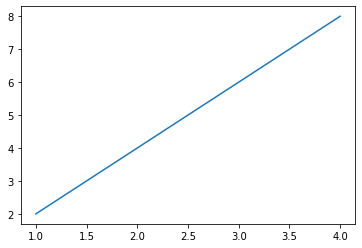

'module://matplotlib_inline.backend_inline'

In [12]:
# %matplotlib inline

# x = [1,2,3,4]
# y = [2,4,6,8]


# plt.plot(x,y)
# plt.show()
# plt.get_backend()